# Multi armed Bandits
## or k-armed Bandits

This notebook implements the Suton and Barton 2.2 exercice. It implements a k-armed bandits

In [529]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

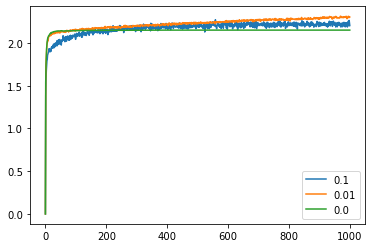

In [780]:
for eps in [0.1, 0.01, 0.0]:
    n_steps = 1000
    a = []
    full = []
    
    for i in range(0,2000):
        Rc = np.zeros(10)
        Ravg = np.zeros(n_steps)
        Q = np.random.normal(0, 1, size=10)
        
        for j in range(1, n_steps):
            # explore or exploit with prob eps
            if np.random.rand() < (1 - eps):
                A = np.argmax(Q)
            else:                    
                A = np.random.randint(0,9)
            
            R = np.random.normal(Q[A], 1)
            Rc[A] = Rc[A] + 1        
            Q[A] = Q[A] +  (R - Q[A])/Rc[A]
            Ravg[j] = Q[A]

        a.append(Ravg)
        
    plt.plot(np.array(a).mean(axis=0), label=eps)    
    plt.legend()
plt.show()

# Nonstatinary problem (2.5 problem)

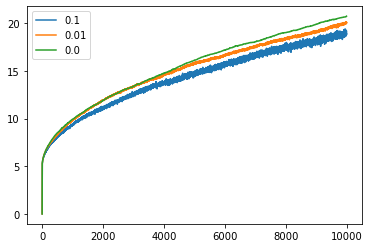

In [796]:
for eps in [0.1, 0.01, 0.0]:
    n_steps = 10000
    a = []
    full = []
    alpha = 0.01
    
    for i in range(0,1000):
        Rc = np.zeros(10)
        Ravg = np.zeros(n_steps)
        Q = np.ones(10)*5

        for j in range(1, n_steps):
            # explore or exploit with prob eps
            Q = Q + np.random.normal(0, 0.1, size=(10))

            if np.random.rand() < (1 - eps):
                A = np.argmax(Q)
            else:                    
                A = np.random.randint(0,9)

            R = np.random.normal(Q[A], 1)
            Rc[A] = Rc[A] + 1        
            Q[A] = Q[A] + (R - Q[A])*alpha
            Ravg[j] = Q[A]
          #  print(A, Q[A])

        a.append(Ravg)
        
    plt.plot(np.array(a).mean(axis=0), label=eps)    
    plt.legend()
plt.show()